In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
import os
os.getcwd()

'C:\\Users\\duasp\\datasets'

In [53]:
cd ..

C:\Users\duasp


In [54]:
cd datasets/

C:\Users\duasp\datasets


In [55]:
df=pd.read_csv('monthly-car-sales.csv')

In [56]:
df

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


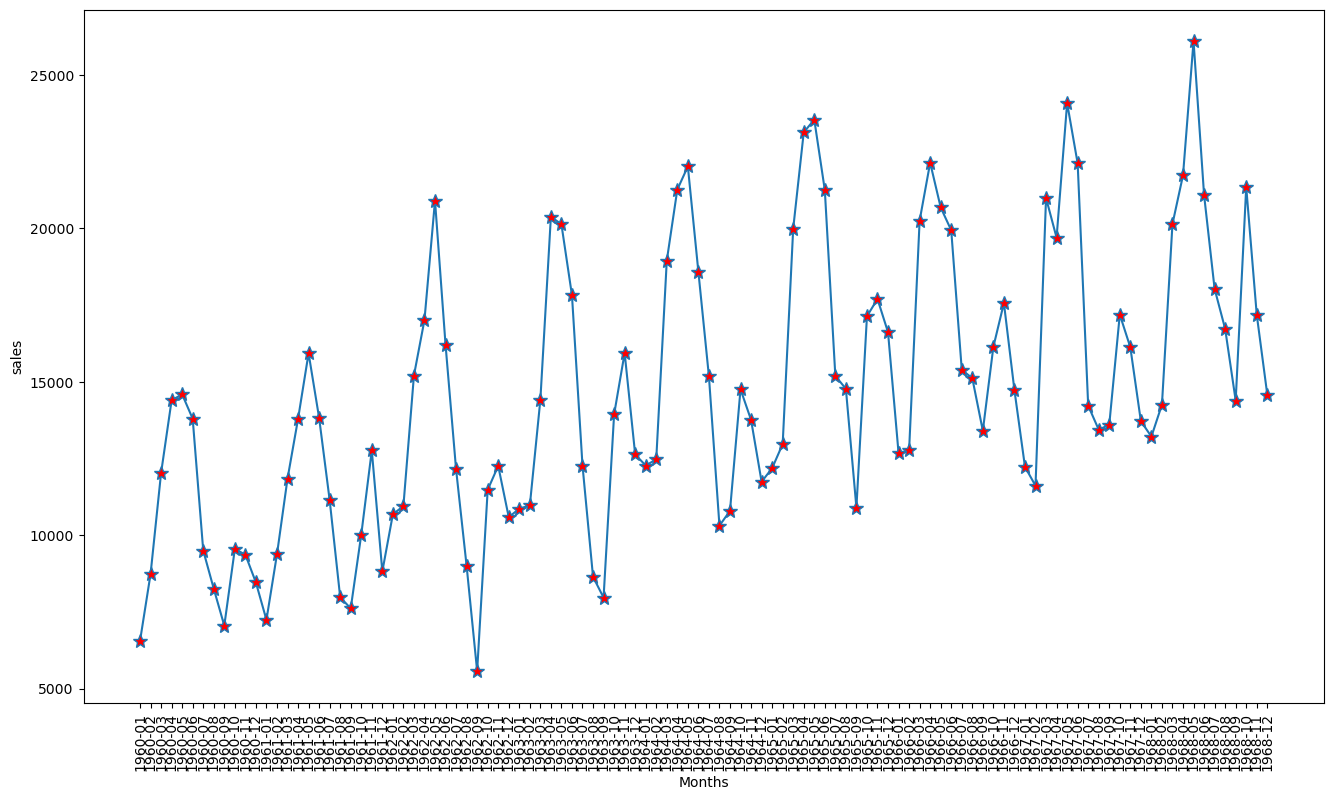

In [57]:
plt.figure(figsize=(16,9))
plt.xlabel('Months')
plt.ylabel('sales')
plt.xticks(rotation='vertical')
plt.plot(df['Month'],df['Sales'],marker='*',mfc='r',ms=10)

In [58]:
df.columns

Index(['Month', 'Sales'], dtype='object')

In [59]:
df.columns=['ds','y']

In [60]:
df.columns

Index(['ds', 'y'], dtype='object')

In [61]:
df

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [62]:
df['ds']=pd.to_datetime(df['ds'])

In [63]:
df

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [64]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [65]:
df.iloc[1,0]

Timestamp('1960-02-01 00:00:00')

In [66]:
import time

In [67]:
time.time()

1727764489.5931985

In [68]:
time.asctime()

'Tue Oct  1 12:04:49 2024'

In [69]:
time.localtime()

time.struct_time(tm_year=2024, tm_mon=10, tm_mday=1, tm_hour=12, tm_min=4, tm_sec=49, tm_wday=1, tm_yday=275, tm_isdst=0)

<h4>Build the model</h4>

In [71]:
from prophet import Prophet

In [72]:
model=Prophet(weekly_seasonality=True,daily_seasonality=True)

In [73]:
model.fit(df)

12:04:49 - cmdstanpy - INFO - Chain [1] start processing
12:04:49 - cmdstanpy - INFO - Chain [1] done processing


In [74]:
#define the period for which we want a prediction
future=list()
for i in range(1,13):
    date='1969-%02d'%i
    future.append([date])

for i in range(1,13):
    date='1970-%02d'%i
    future.append([date])

for i in range(1,13):
    date='1971-%02d'%i
    future.append([date])

In [75]:
future

[['1969-01'],
 ['1969-02'],
 ['1969-03'],
 ['1969-04'],
 ['1969-05'],
 ['1969-06'],
 ['1969-07'],
 ['1969-08'],
 ['1969-09'],
 ['1969-10'],
 ['1969-11'],
 ['1969-12'],
 ['1970-01'],
 ['1970-02'],
 ['1970-03'],
 ['1970-04'],
 ['1970-05'],
 ['1970-06'],
 ['1970-07'],
 ['1970-08'],
 ['1970-09'],
 ['1970-10'],
 ['1970-11'],
 ['1970-12'],
 ['1971-01'],
 ['1971-02'],
 ['1971-03'],
 ['1971-04'],
 ['1971-05'],
 ['1971-06'],
 ['1971-07'],
 ['1971-08'],
 ['1971-09'],
 ['1971-10'],
 ['1971-11'],
 ['1971-12']]

In [76]:
future=pd.DataFrame(future,columns=['ds'])
future

,ds
0,1969-01
1,1969-02
2,1969-03
3,1969-04
4,1969-05
5,1969-06
6,1969-07
7,1969-08
8,1969-09
9,1969-10


In [77]:
#predict on the future time
forecast=model.predict(future)

In [78]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1969-01-01,16076.662636,14488.777521,17551.624644,16076.636476,16076.777217,-37.390946,-37.390946,-37.390946,2481.534678,...,291.115404,291.115404,291.115404,-2810.041029,-2810.041029,-2810.041029,0.0,0.0,0.0,16039.271690
1,1969-02-01,16134.855576,13464.672684,16402.060698,16133.721888,16136.039684,-1206.698236,-1206.698236,-1206.698236,2481.534678,...,-894.970832,-894.970832,-894.970832,-2793.262082,-2793.262082,-2793.262082,0.0,0.0,0.0,14928.157340
2,1969-03-01,16187.416940,18831.726553,21827.291802,16184.648790,16190.471035,4199.133186,4199.133186,4199.133186,2481.534678,...,-894.970832,-894.970832,-894.970832,2612.569340,2612.569340,2612.569340,0.0,0.0,0.0,20386.550127
3,1969-04-01,16245.609880,22551.460408,25622.195428,16240.620831,16251.046579,7813.243058,7813.243058,7813.243058,2481.534678,...,440.372868,440.372868,440.372868,4891.335512,4891.335512,4891.335512,0.0,0.0,0.0,24058.852938
4,1969-05-01,16301.925628,23919.412569,27007.363905,16293.934840,16309.754024,9093.273353,9093.273353,9093.273353,2481.534678,...,270.647674,270.647674,270.647674,6341.091001,6341.091001,6341.091001,0.0,0.0,0.0,25395.198981
5,1969-06-01,16360.118567,20209.523562,23345.973361,16349.415424,16371.202764,5449.276953,5449.276953,5449.276953,2481.534678,...,-494.946881,-494.946881,-494.946881,3462.689155,3462.689155,3462.689155,0.0,0.0,0.0,21809.395521
6,1969-07-01,16416.434315,16864.475693,20037.919973,16401.899917,16430.772555,2074.226403,2074.226403,2074.226403,2481.534678,...,440.372868,440.372868,440.372868,-847.681144,-847.681144,-847.681144,0.0,0.0,0.0,18490.660718
7,1969-08-01,16474.627255,14161.257970,17153.317576,16455.909791,16493.358585,-790.823815,-790.823815,-790.823815,2481.534678,...,-52.091765,-52.091765,-52.091765,-3220.266728,-3220.266728,-3220.266728,0.0,0.0,0.0,15683.803440
8,1969-09-01,16532.820194,13223.311379,16197.093973,16508.914677,16556.140297,-1727.774897,-1727.774897,-1727.774897,2481.534678,...,439.873531,439.873531,439.873531,-4649.183107,-4649.183107,-4649.183107,0.0,0.0,0.0,14805.045298
9,1969-10-01,16589.135942,17678.504538,20616.882542,16560.153532,16616.700620,2606.836487,2606.836487,2606.836487,2481.534678,...,291.115404,291.115404,291.115404,-165.813596,-165.813596,-165.813596,0.0,0.0,0.0,19195.972429


In [79]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [80]:
#summarize the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1969-01-01,16039.271690,14488.777521,17551.624644
1,1969-02-01,14928.157340,13464.672684,16402.060698
2,1969-03-01,20386.550127,18831.726553,21827.291802
3,1969-04-01,24058.852938,22551.460408,25622.195428
4,1969-05-01,25395.198981,23919.412569,27007.363905
5,1969-06-01,21809.395521,20209.523562,23345.973361
6,1969-07-01,18490.660718,16864.475693,20037.919973
7,1969-08-01,15683.803440,14161.257970,17153.317576
8,1969-09-01,14805.045298,13223.311379,16197.093973
9,1969-10-01,19195.972429,17678.504538,20616.882542


C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


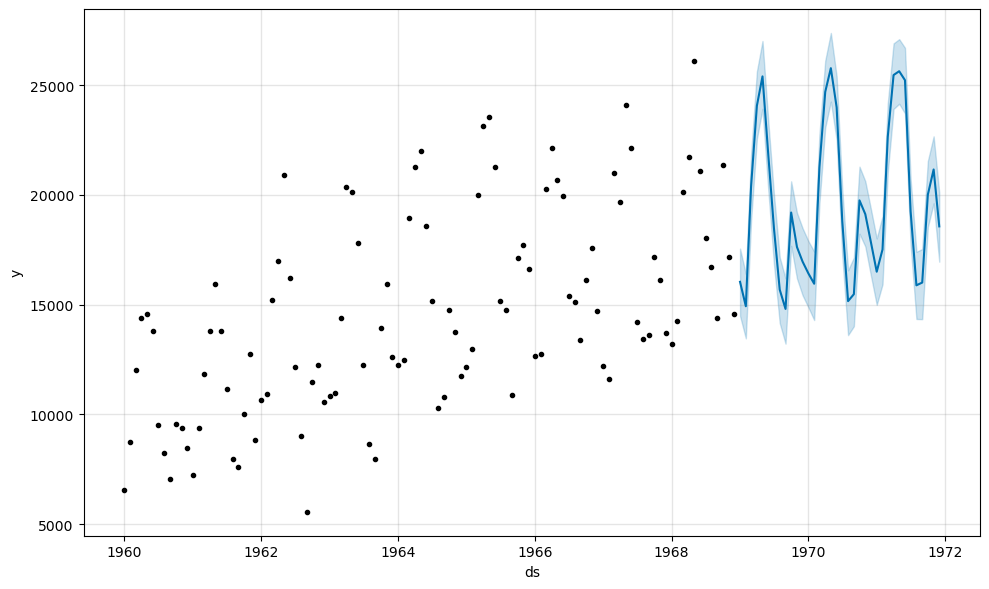

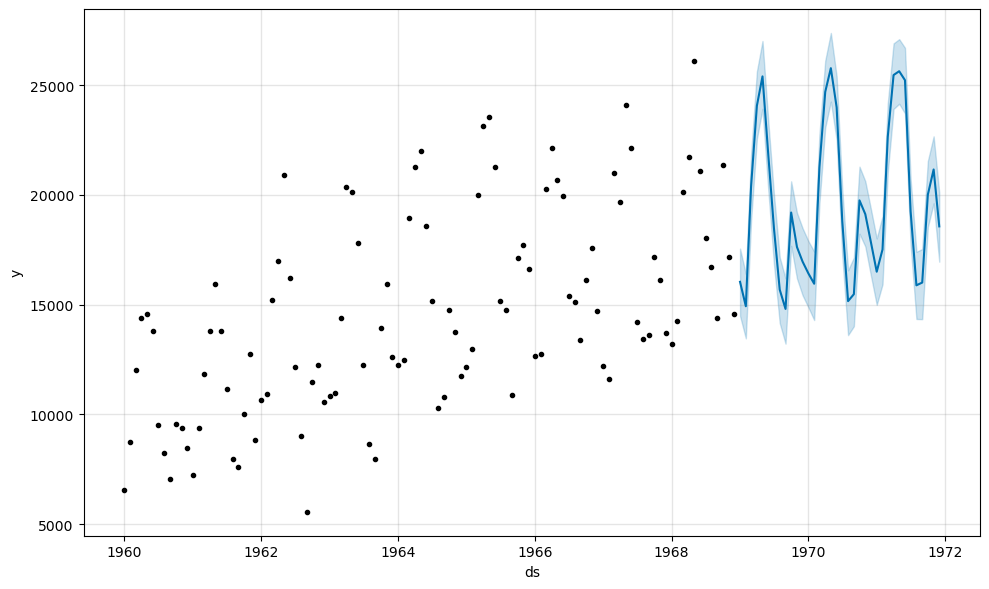

In [81]:
model.plot(forecast)

In [82]:
df

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [83]:
new=forecast[['ds','yhat']]

In [84]:
new

,ds,yhat
0,1969-01-01,16039.271690
1,1969-02-01,14928.157340
2,1969-03-01,20386.550127
3,1969-04-01,24058.852938
4,1969-05-01,25395.198981
5,1969-06-01,21809.395521
6,1969-07-01,18490.660718
7,1969-08-01,15683.803440
8,1969-09-01,14805.045298
9,1969-10-01,19195.972429


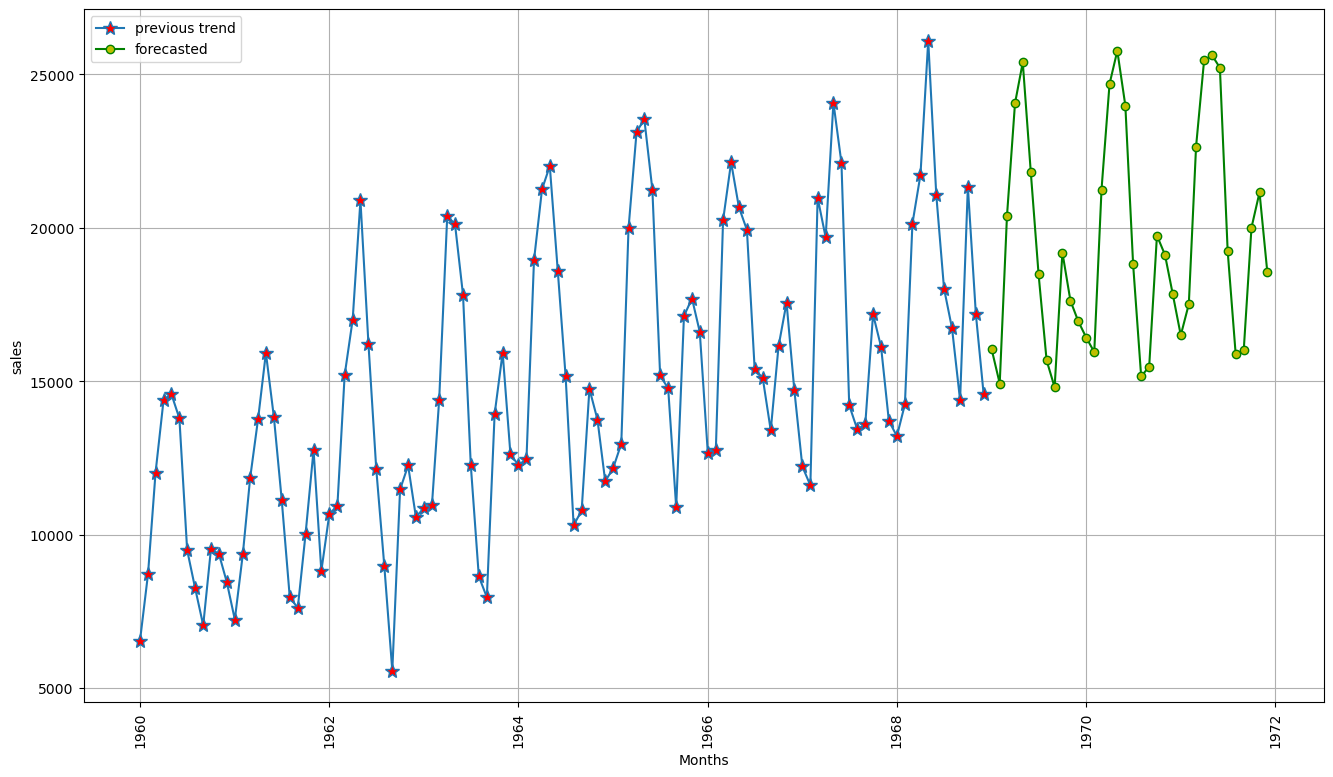

In [85]:
plt.figure(figsize=(16,9))
plt.grid()
plt.xlabel('Months')
plt.ylabel('sales')
plt.xticks(rotation='vertical')
plt.plot(df['ds'],df['y'],marker='*',label = "previous trend", mfc='r',ms=10)
plt.plot(new['ds'],new['yhat'],marker = 'o', label="forecasted",color='g',mfc='y')
plt.legend()

<h4>Sea level</h4>

In [87]:
df = pd.read_csv("sealevel.csv")

In [88]:
df

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21
...,...,...,...,...,...,...,...,...,...
1043,2021,334929.31,49.26,85.01,49.78,56.17,84.76,56.69,60.49
1044,2021,338042.09,50.49,85.94,49.66,57.42,85.65,56.57,60.56
1045,2021,337369.81,49.65,84.02,49.58,56.57,83.78,56.50,60.53
1046,2021,335464.09,47.46,82.66,49.54,54.41,82.45,56.46,60.36


In [89]:
new_Sea = df[["Year", "GMSL_noGIA"]]

In [90]:
new_Sea = new_Sea.groupby('Year', as_index=False)['GMSL_noGIA'].mean()
new_Sea.columns = ['ds', 'y']  

In [103]:
new_Sea['ds'] = pd.to_datetime(new_Sea['ds'], format='%Y')
new_Sea

,ds,y
0,1993-01-01,-34.605405
1,1994-01-01,-30.951081
2,1995-01-01,-28.645946
3,1996-01-01,-26.596389
4,1997-01-01,-22.682432
5,1998-01-01,-25.060541
6,1999-01-01,-21.812432
7,2000-01-01,-18.425405
8,2001-01-01,-13.219189
9,2002-01-01,-9.372778


In [92]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True)

In [93]:
model.fit(new_Sea)

12:04:50 - cmdstanpy - INFO - Chain [1] start processing
12:04:50 - cmdstanpy - INFO - Chain [1] done processing


In [111]:
future = pd.DataFrame({'ds': pd.date_range('2022-01-01', '2030-12-31', freq='Y')})

C:\Users\duasp\AppData\Local\Temp\ipykernel_9940\302206322.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future = pd.DataFrame({'ds': pd.date_range('2022-01-01', '2030-12-31', freq='Y')})


In [121]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-12-31,98.874028,51.680941,60.101773,98.873688,98.874376,-43.137962,-43.137962,-43.137962,91.467478,...,-1.737257,-1.737257,-1.737257,-132.868183,-132.868183,-132.868183,0.0,0.0,0.0,55.736066
1,2023-12-31,101.978566,58.148523,67.128897,101.977460,101.979665,-39.551956,-39.551956,-39.551956,91.467478,...,0.520306,0.520306,0.520306,-131.539740,-131.539740,-131.539740,0.0,0.0,0.0,62.426610
2,2024-12-31,105.091609,57.233985,66.189745,105.089467,105.093645,-43.329888,-43.329888,-43.329888,91.467478,...,-0.101856,-0.101856,-0.101856,-134.695509,-134.695509,-134.695509,0.0,0.0,0.0,61.761721
3,2025-12-31,108.196146,62.423292,71.412735,108.192826,108.199323,-41.170244,-41.170244,-41.170244,91.467478,...,1.282956,1.282956,1.282956,-133.920677,-133.920677,-133.920677,0.0,0.0,0.0,67.025903
4,2026-12-31,111.300684,65.210852,73.544026,111.295976,111.305253,-41.705328,-41.705328,-41.705328,91.467478,...,-0.304622,-0.304622,-0.304622,-132.868183,-132.868183,-132.868183,0.0,0.0,0.0,69.595356
5,2027-12-31,114.405221,70.091776,78.773903,114.399057,114.411161,-39.949748,-39.949748,-39.949748,91.467478,...,0.122514,0.122514,0.122514,-131.539740,-131.539740,-131.539740,0.0,0.0,0.0,74.455473
6,2028-12-31,117.518264,70.263269,79.211342,117.510380,117.526114,-42.707725,-42.707725,-42.707725,91.467478,...,0.520306,0.520306,0.520306,-134.695509,-134.695509,-134.695509,0.0,0.0,0.0,74.810539
7,2029-12-31,120.622802,73.794530,82.876568,120.613134,120.632526,-42.235239,-42.235239,-42.235239,91.467478,...,0.217960,0.217960,0.217960,-133.920677,-133.920677,-133.920677,0.0,0.0,0.0,78.387562
8,2030-12-31,123.727339,77.897155,87.009768,123.716148,123.738754,-41.502562,-41.502562,-41.502562,91.467478,...,-0.101856,-0.101856,-0.101856,-132.868183,-132.868183,-132.868183,0.0,0.0,0.0,82.224777


In [115]:
new = forecast[['ds', 'yhat']]  

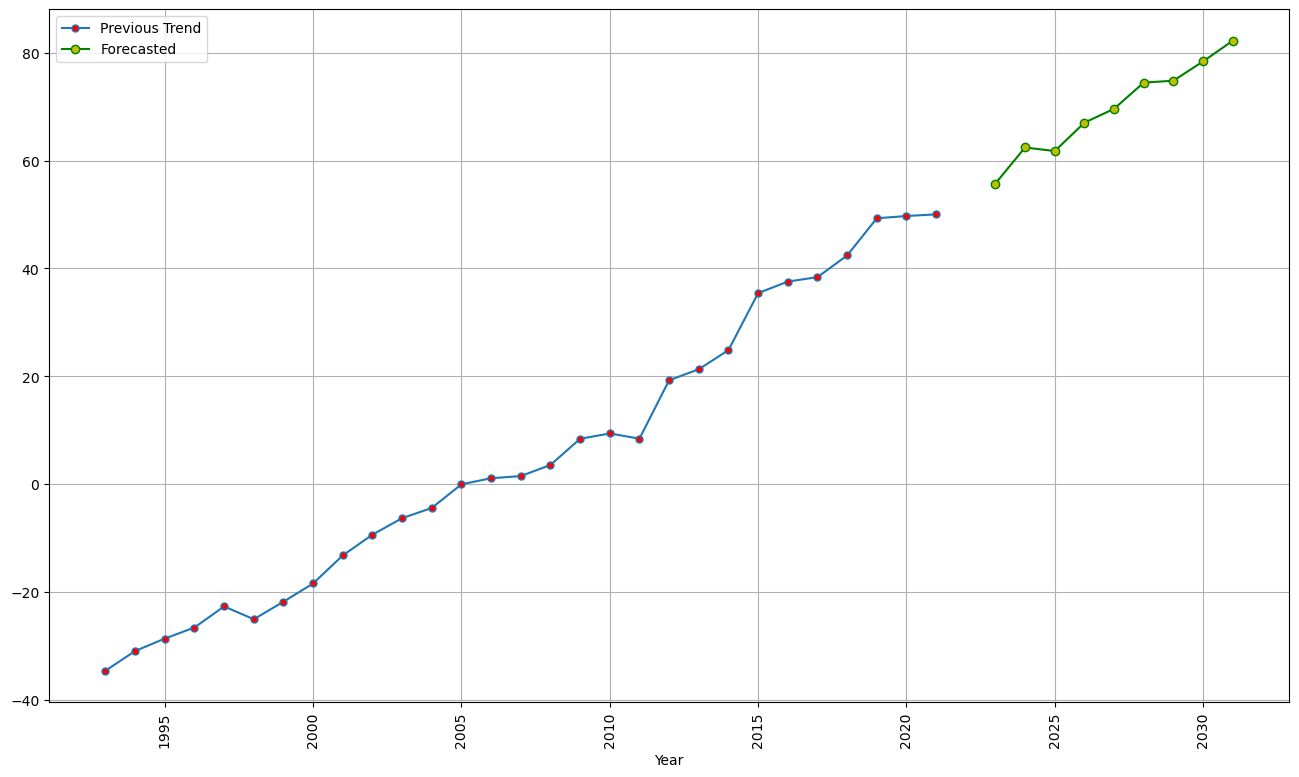

In [117]:
# Plotting
plt.figure(figsize=(16, 9))
plt.grid()
plt.xlabel('Year')
plt.xticks(rotation='vertical')
plt.plot(new_Sea['ds'], new_Sea['y'], marker='o', label="Previous Trend", mfc='r', ms=5)
plt.plot(new['ds'], new['yhat'], marker='o', label="Forecasted", color='g', mfc='y')
plt.legend()